In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load and preprocess data
train_dir = '/content/drive/MyDrive/bunga/bunga/train'
val_dir = '/content/drive/MyDrive/bunga/bunga/validation'

In [ ]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Only rescaling for the validation set
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 710 images belonging to 4 classes.


In [ ]:
# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 160 images belonging to 4 classes.


In [ ]:
# Number of classes
num_classes = len(train_generator.class_indices)

In [ ]:
# Class mapping
class_labels = train_generator.class_indices
class_labels = {v + 1: k for k, v in class_labels.items()}

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with Adam optimizer
history_adam = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8375 - loss: 0.8283 - val_accuracy: 0.2625 - val_loss: 1.7270
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8998 - loss: 0.3842 - val_accuracy: 0.2688 - val_loss: 1.9930
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.8936 - loss: 0.3868 - val_accuracy: 0.2688 - val_loss: 2.7116
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8645 - loss: 0.6074 - val_accuracy: 0.2500 - val_loss: 4.5317
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.8753 - loss: 0.5083 - val_accuracy: 0.2812 - val_loss: 4.3784
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8827 - loss: 0.4291 - val_accuracy: 0.3812 - val_loss: 3.4162
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.8882 - loss: 0.3643 - val_accuracy: 0.4812 - val_loss: 2.5390
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.9060 - loss: 0.3099 - val_accuracy: 0.6562 - val_loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 569ms/step - accuracy: 0.9923 - loss: 0.0204
Validation Loss: 0.017994921654462814
Validation Accuracy: 0.9937499761581421


In [ ]:
# Generate confusion matrix for validation data
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 558ms/step


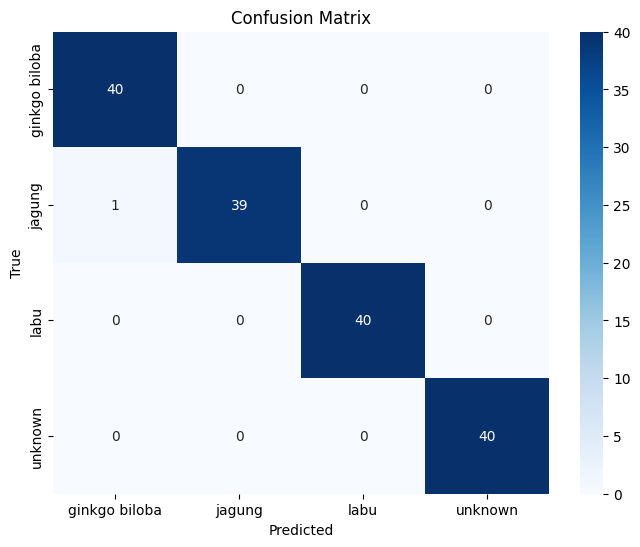

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(train_generator.class_indices.keys()), yticklabels=list(train_generator.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()))
print(report)

               precision    recall  f1-score   support

ginkgo biloba       0.98      1.00      0.99        40
       jagung       1.00      0.97      0.99        40
         labu       1.00      1.00      1.00        40
      unknown       1.00      1.00      1.00        40

     accuracy                           0.99       160
    macro avg       0.99      0.99      0.99       160
 weighted avg       0.99      0.99      0.99       160



In [ ]:
# Simpan model
model.save('type_model.h5')

In [ ]:
from google.colab import files
files.download('/content/type_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save('class_labels.npy', class_labels)